## Задание 1
В файле содержится информация о покупках людей
- id – означает покупку (в одну покупку входят все товары, купленные пользователем во время 1 похода в магазин)
- Товар – наименование товара
- Количество – число единиц купленного товара  

Воспользуйтесь этими данными и выясните, какие пары товаров пользователи чаще всего покупают вместе. По сути, вам необходимо найти паттерны покупок, что позволит оптимизировать размещение продуктов в магазине, для удобства пользователей и увеличения выручки.

- 1_Товар – наименование первого товара
- 2_Товар – наименование второго товара
- Встречаемость – число раз, когда такая пара была встречена

Напишите код на python для получения нужной таблицы и укажите 5 наиболее распространённых паттернов.

In [2]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter

In [3]:
purchases = pd.read_csv('https://stepik.org/media/attachments/lesson/409319/test1_completed.csv')

In [4]:
# сортировка для исключения повторяющихся пар
purchases = purchases.sort_values(by=['id', 'Товар'])

In [5]:
purchases = purchases.drop('Количество', 1)

In [6]:
# создание фрейма с группировкой по два элемента
def combine(group):
    return pd.DataFrame.from_records(combinations(group.Товар, 2))

purchases = purchases.groupby('id').apply(combine)

In [7]:
purchases = purchases.reset_index().drop(['id', 'level_1'], 1)
purchases.columns = ['Товар_1', 'Товар_2']

In [8]:
# подсчет количества пар
purchases = purchases.value_counts()
purchases = pd.DataFrame(purchases)

In [9]:
purchases = purchases.reset_index().rename(columns=({0:  'Встречаемость'}))

In [24]:
# 5 наиболее распространённых паттернов
purchases.head()

,Товар_1,Товар_2,Встречаемость
0,Огурцы Луховицкие,Укроп,431
1,Петрушка,Укроп,408
2,Арбуз,Огурцы Луховицкие,345
3,Кабачки,Огурцы Луховицкие,326
4,Кинза,Укроп,303


## Задание 2
К вам поступила информация о числе заказов за прошедшие 3 месяца с разрешением по неделям. Постройте (если это возможно) прогноз продаж на следующие 3 месяца, с учётом того, что в неделю с 2020-02-02 по 2020-02-09 была проведена массивная акция, повысившая число заказов на 7%

In [25]:
import seaborn as sns
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
orders_by_week = pd.read_csv('https://stepik.org/media/attachments/lesson/426638/test2_completed.csv')

In [27]:
orders_by_week

,Дата,Число заказов
0,2020-01-05,650
1,2020-01-12,837
2,2020-01-19,1020
3,2020-01-26,1176
4,2020-02-02,1489
5,2020-02-09,1823
6,2020-02-16,1991
7,2020-02-23,2166
8,2020-03-01,2334
9,2020-03-08,2607


In [28]:
orders_by_week['Дата'] = pd.to_datetime(orders_by_week['Дата'])

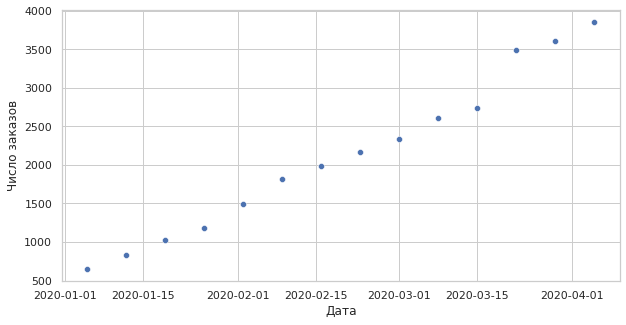

In [29]:
# Диаграмма рассеяния
sns.set(style='whitegrid', rc={'figure.figsize' : (10,5)})
sns.scatterplot(data=orders_by_week, x=orders_by_week['Дата'], y=orders_by_week['Число заказов'])

### Выводы:
 1. У нас мало данных для построения точного прогноза
 2. На основании имеющихся данных наблюдаем восходящий линейный тренд
 3. Фактор сезонности неизвестен (данные за непродолжительный период)
 4. Т.к. товары - это продукты питания, то можно предположить, что в течение года направление тренда может меняться
 5. Ряд существенно не изменил свой характер из за проведенной акции
 6. Выбросы отсутствуют

В нашем случае можно попробовать применить Facebook Prophet без учета сезонности, праздников, дополнительных предикторов и т.д.
Для сравнения результатов в конце ссылка на прогноз с помощью Tableau.

Построение прогноза с помощью библиотеки Facebook Prophet:

In [30]:
orders_by_week.columns = ["ds", "y"]

In [31]:
m = Prophet()
m.fit(orders_by_week)
future = m.make_future_dataframe(periods=12, freq='W')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


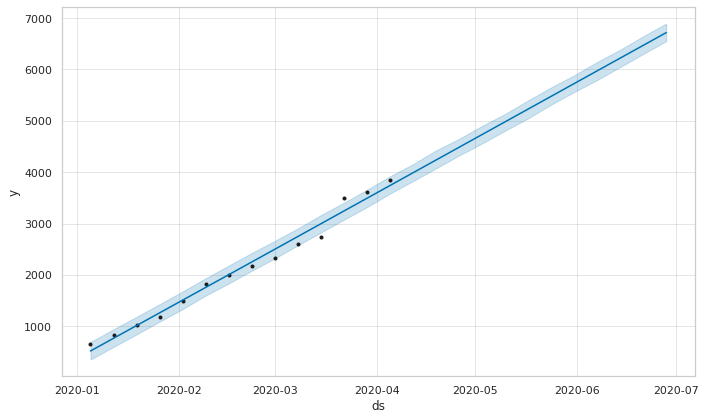

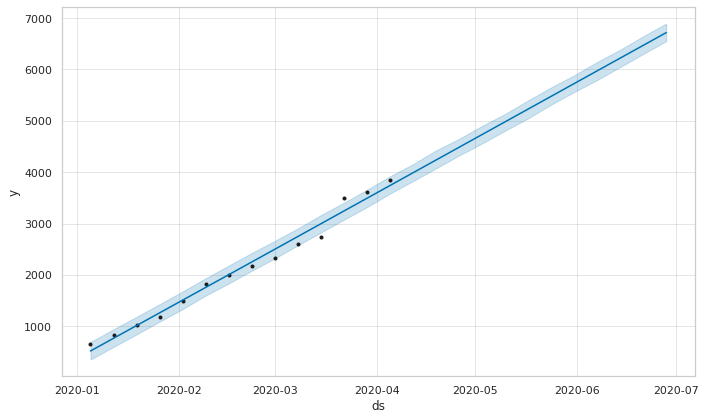

In [32]:
m.plot(forecast)

In [33]:
# Срез по необходимым столбцам и строкам
forecast = forecast[['ds', 'trend', 'yhat_lower','yhat_upper',]].round(0)[14:]

In [34]:
# Результат прогноза
forecast

,ds,trend,yhat_lower,yhat_upper
14,2020-04-12,3987.0,3825.0,4156.0
15,2020-04-19,4235.0,4073.0,4423.0
16,2020-04-26,4484.0,4323.0,4648.0
17,2020-05-03,4732.0,4558.0,4901.0
18,2020-05-10,4980.0,4806.0,5133.0
19,2020-05-17,5228.0,5048.0,5398.0
20,2020-05-24,5476.0,5315.0,5651.0
21,2020-05-31,5724.0,5560.0,5886.0
22,2020-06-07,5973.0,5794.0,6146.0
23,2020-06-14,6221.0,6047.0,6385.0


Прогноз в Tableau - https://public.tableau.com/app/profile/anton.milchakov/viz/SalesForecast_16263937093490/Sheet1

## Задание 3

В базе данных вашей компании присутствуют следующие таблицы:

- city
    - city_id – id города, где проходит акция
    - client_city_id – id города, где находится покупатель
    - city – город
    - client_city – город, где находится покупатель
- client
    - client_id – id покупателя
    - client_city_id – id города, где находится покупатель
    - birth_date – дата рождения покупателя
    - registration – дата регистрации покупателя
- promotion
    - promotion_id – id акции
    - category_id – id категории
    - promotion_name – акция
    - category_name – категория
    - partner_id – id партнёра
    - partner_name – партнёр
- purchase
    - purchase_id – id покупки
    - partner_id – id партнёра
    - client_id – id покупателя
    - city_id – id города
    - promotion_id – id акции
    - category_id – id категории
    - purchase_date – дата покупки
    - price – цена за единицу товара
    - quantity – число проданных единиц
    - status – статус покупки

Вам нужно написать запрос, чтобы получить такую таблицу:

- purchase_date – дата покупки
- purchase_id – id покупки
- client_id – id покупателя
- client_age – возраст покупателя
- client_registration_age – как долго человек пользуется вашими магазинами
- client_category – содержит new или old, если это первая или последующая покупка соответственно
- promotion_name – акция
- category_name – категория
- partner_name – партнёр
- client_city – город, где находится покупатель
- city – город
- revenue – сумма выручки
- quantity – число проданных единиц

При этом в таблице должны присутствовать только значения, где в поле status стоит значение 1, и только те, где purchase_date находится в диапазоне от 01.05.2020 до 01.08.2020

In [35]:
import pandahouse as ph

In [36]:
connection_project_variant_2 = {'host': 'http://clickhouse.beslan.pro:8080',
                                'database': 'project_variant_2',
                                'user': 'student',
                                'password': 'dpo_python_2020'
                               }

In [37]:
q = '''
SELECT
    M.purchase_date AS purchase_date,
    M.purchase_id AS purchase_id,
    M.client_id AS client_id,
    M.client_age AS client_age,
    M.client_registration_age AS client_registration_age,
    M.client_category AS client_category,
    N.promotion_name AS promotion_name,
    N.category_name AS category_name,
    N.partner_name AS partner_name,
    M.client_city AS client_city,
    M.city AS city,
    M.revenue AS revenue,
    M.quantity AS quantity
FROM
    (
    SELECT
        K.purchase_date AS purchase_date,
        K.purchase_id AS purchase_id,
        K.client_id AS client_id,
        L.client_age AS client_age,
        L.client_registration_age AS client_registration_age,
        K.client_category AS client_category,
        L.client_city AS client_city,
        K.city AS city,
        K.revenue AS revenue,
        K.quantity AS quantity,
        K.promotion_id AS promotion_id
    FROM
        (
        SELECT DISTINCT
            G.purchase_date AS purchase_date,
            G.purchase_id,
            G.client_id,
            G.revenue AS revenue,
            G.quantity AS quantity,
            G.city AS city,
            H.client_category AS client_category,
            G.promotion_id AS promotion_id
        FROM 
            (
            SELECT
                I.purchase_date AS purchase_date,
                I.purchase_id AS purchase_id,
                I.client_id AS client_id,
                I.revenue AS revenue,
                I.quantity AS quantity,
                J.city AS city,
                I.promotion_id AS promotion_id
            FROM
                (
                SELECT
                    purchase_date,
                    purchase_id,
                    client_id,
                    CAST ((quantity * price) AS Float64) AS revenue,
                    CAST (quantity AS Float64) AS quantity,
                    city_id,
                    promotion_id
                FROM project_variant_2.purchase
                WHERE
                    status == 1
                    AND
                    MONTH(purchase_date)
                    BETWEEN 05 AND 07
                ORDER BY purchase_date
                ) AS I
            LEFT JOIN
                (
                SELECT
                    DISTINCT(city),
                    city_id
                FROM project_variant_2.city 
                ) AS J
            ON
                I.city_id = J.city_id
            ) AS G
        LEFT JOIN    
            (
            SELECT
            client_id,
            purchase_date,
            CASE 
                WHEN purchase_date > first_purchace THEN 'old'
                WHEN purchase_date = first_purchace THEN 'new'
                ELSE 'error'
            END AS client_category
        FROM
            (
            SELECT 
            E.client_id AS client_id,
            F.purchase_date AS purchase_date,
            E.first_purchace AS first_purchace
            FROM
                project_variant_2.purchase AS F
            LEFT JOIN
                (
                SELECT
                    client_id,
                    times[1] AS first_purchace
                FROM 
                    (
                    SELECT
                        client_id,
                        arraySort(groupArray(purchase_date)) AS times
                    FROM project_variant_2.purchase
                    GROUP BY 
                        client_id
                    )
                ) AS E
            ON
                F.client_id = E.client_id
                )
            ) AS H
        ON  
            G.client_id = H.client_id
            AND
            G.purchase_date = H.purchase_date
        ) AS K  
    LEFT JOIN  
        (
        SELECT
            A.client_id AS client_id,
            A.client_age AS client_age,
            A.client_registration_age AS client_registration_age,
            B.client_city AS client_city
        FROM 
            (
            SELECT
            client_id,
            client_city_id,
            FLOOR(DATEDIFF(DAY, birth_date, now()) / 365.25) AS client_age,
            FLOOR(DATEDIFF(DAY, registration, now()) / 365.25) AS client_registration_age
        FROM project_variant_2.client
            ) AS A
        LEFT JOIN
            (
            SELECT 
                DISTINCT(client_city_id),
                client_city
            FROM project_variant_2.city 
            ) AS B
        ON 
            A.client_city_id = B.client_city_id
        ) AS L 
    ON
        K.client_id = L.client_id
    ) AS M     
LEFT JOIN
    project_variant_2.promotion AS N
ON
    M.promotion_id = N.promotion_id
'''
result_table = ph.read_clickhouse(query=q, connection=connection_project_variant_2)

In [39]:
# Вывод результирующей таблицы
result_table

,purchase_date,purchase_id,client_id,client_age,client_registration_age,client_category,promotion_name,category_name,partner_name,client_city,city,revenue,quantity
0,2020-05-01,470,918,23.0,1.0,old,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Щучинщина,Ярославль,660.0,4.0
1,2020-05-01,1210,126,29.0,2.0,old,campaign_3,Овощи,Всем партнёрам партнёр,Щучинщина,Ярославль,225.0,1.0
2,2020-05-01,1675,694,20.0,1.0,old,campaign_4,Прочее,KarpovCourses,Вена,Казань,520.0,8.0
3,2020-05-01,1703,630,30.0,2.0,old,campaign_3,Овощи,Всем партнёрам партнёр,Ярославль,Москва,55.0,1.0
4,2020-05-01,1761,841,24.0,1.0,old,campaign_3,Овощи,Всем партнёрам партнёр,Ярославль,Минск,225.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,2020-07-31,7139,110,28.0,2.0,old,campaign_1,Бакалея,Google,Москва,Санкт-Петербург,345.0,3.0
2691,2020-07-31,7341,97,28.0,1.0,old,campaign_4,Прочее,KarpovCourses,Казань,Щучинщина,3600.0,8.0
2692,2020-07-31,7866,851,26.0,2.0,old,campaign_4,Прочее,KarpovCourses,Вена,Ярославль,1305.0,9.0
2693,2020-07-31,7871,557,30.0,1.0,old,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Щучинщина,Минск,280.0,8.0
